## Pandas demo from Jake Reback
see https://github.com/jreback/PyDataNYC2015 or http://pandas.pydata.org/pandas-docs/version/0.17.1/style.html#Table-Styles

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows=12
pd.options.display.width=80

# read a csv
df = pd.read_csv('~/seaborn-data/iris.csv',index_col=False)
# adjust column names
df.columns = df.columns.str.replace('\s+','_').str.lower()
# in pandas 0.17.1 and more : sample and style ... 
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if   (isinstance(val, (int,   float)) and val < 3) else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

cm = sns.light_palette("green", as_cmap=True)

(df
   .sample (n=7)
   .style
   .applymap(color_negative_red, subset=pd.IndexSlice[['sepal_width', 'petal_width']])
   .bar(subset=['sepal_length', 'petal_length'], color='#7F7FFF')
   .background_gradient(subset=['sepal_width', 'petal_width'], cmap=cm)
   .apply(highlight_max)
   .highlight_null(null_color='red')
)

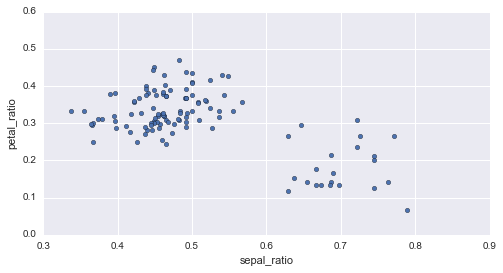

In [2]:
# assign = define new temporary columns (like 'mutate' in R language)
(df
   .query('sepal_length > 5')
   .assign(sepal_ratio = lambda x: x.sepal_width / x.sepal_length,
           petal_ratio = lambda x: x.petal_width / x.petal_length)
   .plot
   .scatter(x='sepal_ratio', y='petal_ratio', figsize=(8,4))
)

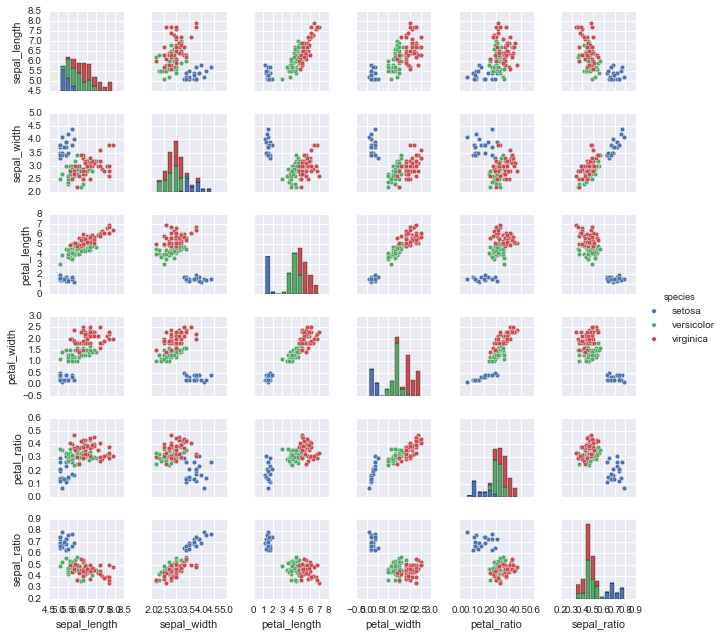

In [3]:
# pipe = like '%>%' in R language
(df
   .query('sepal_length > 5')
   .assign(sepal_ratio = lambda x: x.sepal_width / x.sepal_length,
           petal_ratio = lambda x: x.petal_width / x.petal_length)
   .pipe(sns.pairplot, hue='species', size=1.5)
)

In [4]:
# Pandas interactive
import pandas as pd
import numpy as np

# create a df with random datas
np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[0, 2] = np.nan

# interactive
from IPython.html import widgets
@widgets.interact
def f(h_neg=(0, 359, 1), h_pos=(0, 359), s=(0., 99.9), l=(0., 99.9)):
    return (df
             .style
             .background_gradient(
                cmap=sns.palettes.diverging_palette(
                     h_neg=h_neg, h_pos=h_pos, s=s, l=l, as_cmap=True)
             ).highlight_null()
           )

In [5]:
from IPython.display import HTML

def hover(hover_color="#ff0f99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "150%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (df.style.set_table_styles(styles)
          .set_caption("Hover to highlight."))
html

## Usefull links

### Beginners Training Video: ["Brandon Rhodes - Pandas From The Ground Up - PyCon 2015 "](https://www.youtube.com/watch?v=5JnMutdy6Fw)

### Pandas [API reference](http://pandas.pydata.org/pandas-docs/stable/api.html)
